In [1]:
import os
os.chdir('../../')

In [2]:
import DeepPurpose.models as models
from DeepPurpose.utils import *
from DeepPurpose.dataset import *

In [6]:
X_drug, X_target, y = load_process_DAVIS('./data/')

Beginning Processing...
Beginning to extract zip file...
Default set to logspace (nM -> p) for easier regression
Done!


In [7]:
drug_encoding = 'CNN'
target_encoding = 'CNN'
train, val, test = data_process(X_drug, X_target, y, 
                                drug_encoding, target_encoding, 
                                split_method='random',frac=[0.7,0.1,0.2])

in total: 30056 drug-target pairs
encoding drug...
unique drugs: 68
drug encoding finished...
encoding protein...
unique target sequence: 379
protein encoding finished...
splitting dataset...
Done.


In [8]:
# model setup, you can adjust the config file by typing in model parameters. e.g. cls_hidden_dim = [256, 32]
config = generate_config(drug_encoding = drug_encoding, 
                         target_encoding = target_encoding, 
                         cls_hidden_dims = [32,32], 
                         train_epoch = 2, 
                         LR = 0.01, 
                         batch_size = 32,
                         cnn_drug_filters = [2,4,8],
                         cnn_target_filters = [2,4,8]
                        )
model = models.model_initialize(**config)

--- Data Preparation ---
--- Go for Training ---
Training at Epoch 1 iteration 0 with loss 30.903955
Training at Epoch 1 iteration 100 with loss 1.0422273
Training at Epoch 1 iteration 200 with loss 0.6276186
Training at Epoch 1 iteration 300 with loss 0.40828806
Training at Epoch 1 iteration 400 with loss 0.3923242
Training at Epoch 1 iteration 500 with loss 0.4343851
Training at Epoch 1 iteration 600 with loss 0.8414709
Validation at Epoch 1 , MSE: 0.9001989960201685 , Pearson Correlation: 0.34443848244565667 with p-value: 1.7650809156087627e-84 , Concordance Index: 0.6986057965973057
Training at Epoch 2 iteration 0 with loss 0.692737
Training at Epoch 2 iteration 100 with loss 0.8723929
Training at Epoch 2 iteration 200 with loss 1.1276253
Training at Epoch 2 iteration 300 with loss 0.6805785
Training at Epoch 2 iteration 400 with loss 0.62286913
Training at Epoch 2 iteration 500 with loss 0.46546483
Training at Epoch 2 iteration 600 with loss 0.56252074
Validation at Epoch 2 , MSE:

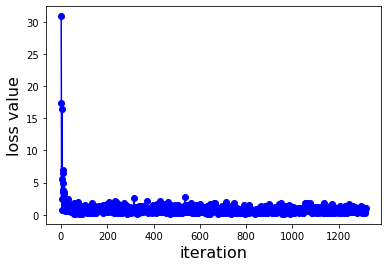

In [21]:
model.train(train, val, test)

In [3]:
#model.save_model('./model')
#model = models.model_pretrained('./model')

In [4]:
X_repurpose, drug_name, drug_cid = load_broad_repurposing_hub('./data/')
target, target_name = load_SARS_CoV_Protease_3CL()

_ = models.repurpose(X_repurpose, target, 
                     model, drug_cid, target_name, 
                     convert_y = True)

repurposing...
in total: 6111 drug-target pairs
encoding drug...
unique drugs: 6111
drug encoding finished...
encoding protein...
unique target sequence: 1
protein encoding finished...
splitting dataset...
Done.
predicting...
---------------
Drug Repurposing Result for SARS-CoV 3CL Protease
Drug 24699.0      predicted to have binding affinity score 154.94
Drug 10468.0      predicted to have binding affinity score 154.94
Drug 8215.0       predicted to have binding affinity score 154.94
Drug 62358.0      predicted to have binding affinity score 154.94
Drug 522232.0     predicted to have binding affinity score 154.94
Drug 24069687.0   predicted to have binding affinity score 154.94
Drug 9554.0       predicted to have binding affinity score 154.94
Drug 97663.0      predicted to have binding affinity score 154.94
Drug 1711973.0    predicted to have binding affinity score 154.94
Drug 5753.0       predicted to have binding affinity score 154.94
Drug 45006141.0   predicted to have binding affi

Drug 60825.0      predicted to have binding affinity score 774.95
Drug 5282339.0    predicted to have binding affinity score 775.14
Drug 398148.0     predicted to have binding affinity score 775.38
Drug 1775.0       predicted to have binding affinity score 779.76
Drug UNK          predicted to have binding affinity score 779.92
Drug 6604918.0    predicted to have binding affinity score 779.95
Drug 67171867.0   predicted to have binding affinity score 780.19
Drug 128019.0     predicted to have binding affinity score 780.82
Drug 4097.0       predicted to have binding affinity score 780.87
Drug 60164.0      predicted to have binding affinity score 781.07
Drug 11998180.0   predicted to have binding affinity score 782.60
Drug 56032.0      predicted to have binding affinity score 783.68
Drug 11288934.0   predicted to have binding affinity score 783.78
Drug 6422124.0    predicted to have binding affinity score 783.79
Drug 24786010.0   predicted to have binding affinity score 783.93
Drug 10809

Drug 5029.0       predicted to have binding affinity score 1311.86
Drug 8582409.0    predicted to have binding affinity score 1311.86
Drug 60663.0      predicted to have binding affinity score 1311.86
Drug 91707.0      predicted to have binding affinity score 1311.86
Drug 2585.0       predicted to have binding affinity score 1314.09
Drug 71739.0      predicted to have binding affinity score 1314.09
Drug 667467.0     predicted to have binding affinity score 1315.38
Drug 1893668.0    predicted to have binding affinity score 1315.38
Drug 5736.0       predicted to have binding affinity score 1315.38
Drug 9934.0       predicted to have binding affinity score 1315.74
Drug 1238.0       predicted to have binding affinity score 1316.11
Drug 3721046.0    predicted to have binding affinity score 1316.90
Drug 155346.0     predicted to have binding affinity score 1317.74
Drug 46885626.0   predicted to have binding affinity score 1317.76
Drug 135403646.0  predicted to have binding affinity score 131

Drug 2807869.0    predicted to have binding affinity score 2888.26
Drug 452192.0     predicted to have binding affinity score 2888.69
Drug 25124816.0   predicted to have binding affinity score 2891.69
Drug 59239165.0   predicted to have binding affinity score 2892.31
Drug 90488870.0   predicted to have binding affinity score 2893.69
Drug 73549.0      predicted to have binding affinity score 2895.12
Drug 20284222.0   predicted to have binding affinity score 2895.36
Drug UNK          predicted to have binding affinity score 2897.74
Drug 15983966.0   predicted to have binding affinity score 2897.85
Drug 25113626.0   predicted to have binding affinity score 2897.96
Drug 129010044.0  predicted to have binding affinity score 2899.83
Drug 9936746.0    predicted to have binding affinity score 2900.14
Drug 92044400.0   predicted to have binding affinity score 2900.15
Drug 6918296.0    predicted to have binding affinity score 2900.22
Drug 6445533.0    predicted to have binding affinity score 290